# Get the data

In [ ]:
!wget https://storage.googleapis.com/superai21/ryxderyseyh3535/train_data600.zip
!wget https://storage.googleapis.com/superai21/ryxderyseyh3535/train_data1200.zip

--2022-04-07 03:58:18--  https://storage.googleapis.com/superai21/ryxderyseyh3535/train_data600.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8466161059 (7.9G) [application/x-zip-compressed]
Saving to: ‘train_data600.zip’

train_data600.zip   100%[===================>]   7.88G   118MB/s    in 1m 41s  

2022-04-07 04:00:00 (79.7 MB/s) - ‘train_data600.zip’ saved [8466161059/8466161059]

--2022-04-07 04:00:00--  https://storage.googleapis.com/superai21/ryxderyseyh3535/train_data1200.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9085503208 (8.5G) 

In [ ]:
!unzip /content/train_data1200.zip
!unzip /content/train_data600.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data1200/train_data27361.csv  
  inflating: train_data1200/train_data27362.csv  
  inflating: train_data1200/train_data27363.csv  
  inflating: train_data1200/train_data27364.csv  
  inflating: train_data1200/train_data27365.csv  
  inflating: train_data1200/train_data27366.csv  
  inflating: train_data1200/train_data27367.csv  
  inflating: train_data1200/train_data27368.csv  
  inflating: train_data1200/train_data27369.csv  
  inflating: train_data1200/train_data2737.csv  
  inflating: train_data1200/train_data27370.csv  
  inflating: train_data1200/train_data27371.csv  
  inflating: train_data1200/train_data27372.csv  
  inflating: train_data1200/train_data27373.csv  
  inflating: train_data1200/train_data27374.csv  
  inflating: train_data1200/train_data27375.csv  
  inflating: train_data1200/train_data27376.csv  
  inflating: train_data1200/train_data27377.csv  
  inflating: train_data1200/train_data27378.csv  


# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import pi
from scipy.fftpack import fft

import os
from tqdm import tqdm
import tensorflow as tf

# Data Exploration

In [ ]:
len(os.listdir("/content/train_data600")), len(os.listdir("/content/train_data1200"))

(29001, 29001)

> - x y z = ค่าความเร่งของแต่ละแกน
> - x y : radial
> - z : axial
> - แกนตั้ง ความเร่ง แกนนอน ความถี่ ทำ fft ควรได้กราฟตามสไลด์ แต่มี noise มาเยอะมาก น่าจะต้อง clear noise ก่อน

# Data Preprocessing

### FFT

- we can identify if there are any frequencies oscillating at a consistent frequency in our signal using the fourier transform

In [ ]:
data_1 = get_data("/content/train_data600/train_data1.csv")
data_1

NameError: ignored

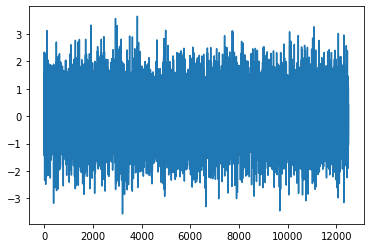

In [ ]:
data_1['x'].plot()

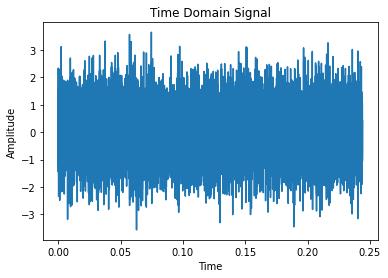

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

signal = data_1['x'].values

sample_rate = 51200
N = int((0.25 - 0) * sample_rate)

time = np.linspace(0, 0.25, N)
time_data = signal

plt.plot (time[:12500], time_data)
plt.title ('Time Domain Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


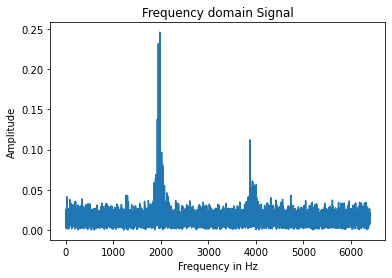

In [ ]:
sample_rate = 51200
N = int((0.25 - 0) * sample_rate) # 512 from 51200

frequency = np.linspace(0.0, int(N/2), int(N/2))
time_data = signal
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


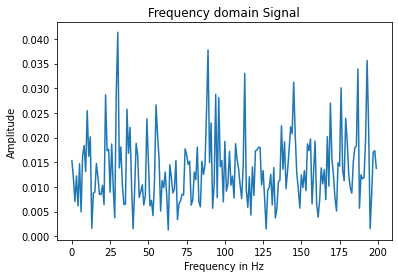

In [ ]:
sample_rate = 51200
N = int((0.25 - 0) * sample_rate) # 512 from 51200

frequency = np.linspace(0.0, int(N/2), int(N/2))
time_data = signal
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

plt.plot(frequency[:200], y[:200])
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


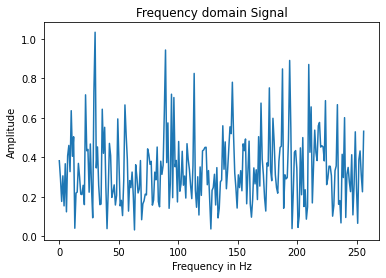

In [ ]:
sample_rate = 51200
N = int((0.01 - 0) * sample_rate) # 512 from 51200

frequency = np.linspace(0.0, int(N/2), int(N/2))
time_data = signal
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
frequency[:20]

array([ 0.        ,  1.00015627,  2.00031255,  3.00046882,  4.0006251 ,
        5.00078137,  6.00093765,  7.00109392,  8.0012502 ,  9.00140647,
       10.00156274, 11.00171902, 12.00187529, 13.00203157, 14.00218784,
       15.00234412, 16.00250039, 17.00265667, 18.00281294, 19.00296921])

In [ ]:
y[:20]

array([0.0153022 , 0.01166755, 0.00706038, 0.01224703, 0.00615737,
       0.01469745, 0.00495299, 0.01631095, 0.01840828, 0.01309864,
       0.02545107, 0.01620711, 0.02016004, 0.00162709, 0.0087578 ,
       0.00894871, 0.01476794, 0.01202101, 0.00853315, 0.00844518])

### FFT function

In [ ]:
df_labels.loc[20]

filename    test_data21.csv
labels                    2
Name: 20, dtype: object

In [ ]:
# signal = data_21['x'].values
def get_fft_data(signal):

  sample_rate = 51200
  N = int((0.25 - 0) * sample_rate) # 512 from 51200

  frequency = np.linspace(0.0, int(sample_rate/2), int(N/2))
  time_data = signal
  freq_data = fft(time_data)

  y = 2/N * np.abs(freq_data[0:np.int(N/2)])

  # frequency = frequency[:50]
  # y = y[:50] 

  return frequency, y

### X, Y, Z of data 21 (label unbalanced)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


6400


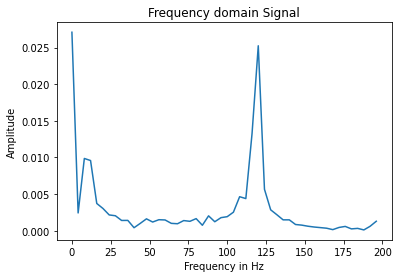

In [ ]:
data_21 = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
signal = data_21['x'].values

frequency, y = get_fft_data(signal)
print(len(y))

plt.plot(frequency[:50], y[:50])
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


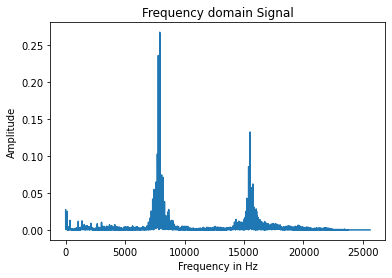

In [ ]:
data_21 = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
signal = data_21['x'].values

sample_rate = 51200
N = int((0.25 - 0) * sample_rate)

frequency = np.linspace(0.0, int(sample_rate/2), int(N/2))
time_data = signal
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

plt.plot(frequency[:], y[:])
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


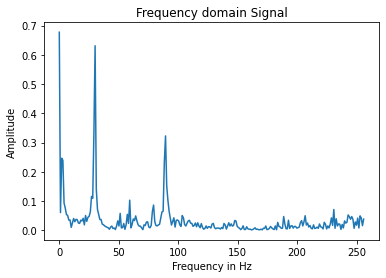

In [ ]:
data_21 = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
signal = data_21['x'].values
frequency, y = get_fft_data_200Hz(signal)

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


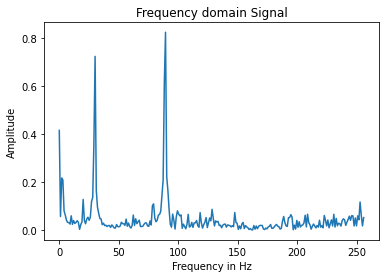

In [ ]:
signal = data_21['y'].values
frequency, y = get_fft_data_200Hz(signal)

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


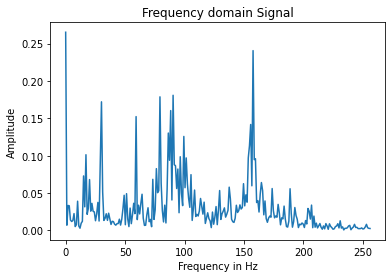

In [ ]:
data_21 = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
signal = data_21['z'].values
frequency, y = get_fft_data_200Hz(signal)

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

### plot graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


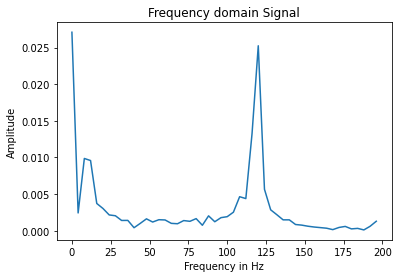

In [ ]:
data = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
signal = data['x'].values

sample_rate = 51200
N = int((0.25 - 0) * sample_rate)

frequency = np.linspace(0.0, int(sample_rate/2), int(N/2))
time_data = signal
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

plt.plot(frequency[:50], y[:50])
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
df_labels[df_labels['labels'] == 4].index

Int64Index([    3,     9,    49,    88,   112,   133,   139,   243,   322,
              326,
            ...
            28729, 28752, 28795, 28796, 28843, 28864, 28867, 28886, 28892,
            28908],
           dtype='int64', length=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


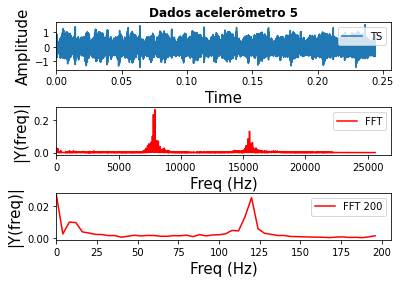

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

data = pd.read_csv('/content/train_data600/train_data51.csv', header = None, names = ['x','y','z'])

sample_rate = 51200
N = int((0.25) * sample_rate)

time = np.linspace(0, 0.25, N)
time_data = signal

frequency = np.linspace(0.0, int(sample_rate/2), int(N/2))
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

# Plots
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [16,12]
# plt.rcParams.update({'font.size':18})

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(hspace=0.8)

plt.sca(axs[0])
plt.plot(time[:12500],time_data, LineWidth=1.5 ,label = 'TS')
plt.xlim(0,)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Dados acelerômetro 5', fontweight='bold');
plt.legend()

plt.sca(axs[1])
plt.plot(frequency,y,'r', LineWidth=1.5 ,label = 'FFT')  
plt.xlim(0,)       
plt.xlabel('Freq (Hz)',fontsize=15)
plt.ylabel('|Y(freq)|',fontsize=15)
plt.legend()

plt.sca(axs[2])
plt.plot(frequency[:50],y[:50],'r', LineWidth=1.5 ,label = 'FFT 200')  
plt.xlim(0,)          
plt.xlabel('Freq (Hz)',fontsize=15)
plt.ylabel('|Y(freq)|',fontsize=15)
plt.legend()

### get all data

In [ ]:
len(os.listdir("/content/train_data600"))

29001

In [ ]:
df_labels = pd.read_csv("/content/train_data1200/label.csv", header=None)
df_labels.rename({0:'filename', 1:'labels'}, axis=1, inplace=True)
df_labels

,filename,labels
0,test_data1.csv,10
1,test_data2.csv,26
2,test_data3.csv,14
3,test_data4.csv,4
4,test_data5.csv,8
...,...,...
28995,test_data28996.csv,14
28996,test_data28997.csv,24
28997,test_data28998.csv,9
28998,test_data28999.csv,19


In [ ]:
path_600 = "/content/train_data600/"
df_train = pd.DataFrame(df_labels['filename'].values, columns=['filename'])
df_train['filename'] = df_train['filename'].apply(lambda x:x.replace("test","train"))
df_train['path'] = df_train['filename'].apply(lambda x: path_600+x)
df_train['labels'] = df_labels['labels'].values
df_train

,filename,path,labels
0,train_data1.csv,/content/train_data600/train_data1.csv,10
1,train_data2.csv,/content/train_data600/train_data2.csv,26
2,train_data3.csv,/content/train_data600/train_data3.csv,14
3,train_data4.csv,/content/train_data600/train_data4.csv,4
4,train_data5.csv,/content/train_data600/train_data5.csv,8
...,...,...,...
28995,train_data28996.csv,/content/train_data600/train_data28996.csv,14
28996,train_data28997.csv,/content/train_data600/train_data28997.csv,24
28997,train_data28998.csv,/content/train_data600/train_data28998.csv,9
28998,train_data28999.csv,/content/train_data600/train_data28999.csv,19


### raw data - seperate each signal

In [ ]:
signal_x = data['x'].values
signal_y = data['y'].values
signal_z = data['z'].values
np.array([signal_x,signal_y,signal_z]).reshape(12500, 3)

array([[ 0.305621  , -0.309547  , -0.4332562 ],
       [-0.00173782,  0.1213333 ,  0.1521855 ],
       [ 0.3361354 , -0.05334588, -0.6051955 ],
       ...,
       [ 0.5332285 ,  0.2122374 , -0.3974738 ],
       [-1.159416  , -0.6099846 ,  0.8324562 ],
       [ 0.7992502 ,  0.2926347 ,  0.2518003 ]])

In [ ]:
data_train_x = []
data_train_y = []
data_train_z = []
label = []

for index, row in tqdm(df_train[::].iterrows()):
  data = pd.read_csv(row['path'], header = None, names = ['x','y','z'])
  signal_x = data['x'].values
  signal_y = data['y'].values
  signal_z = data['z'].values

  frequency, fft_x = get_fft_data_200Hz(signal_x)
  frequency, fft_y = get_fft_data_200Hz(signal_y)
  frequency, fft_z = get_fft_data_200Hz(signal_z)

  # signal_x = np.expand_dims(signal_x, 1)
  # signal_y = np.expand_dims(signal_y, 1)
  # signal_z = np.expand_dims(signal_z, 1)
  fft_x = np.expand_dims(fft_x, 1)
  fft_y = np.expand_dims(fft_y, 1)
  fft_z = np.expand_dims(fft_z, 1)


  data_train_x.append(signal_x)
  data_train_y.append(signal_y)
  data_train_z.append(signal_z)

  #data_train.append(signal)
  label.append(row['labels'])

14500it [03:01, 79.76it/s]


In [ ]:
data_train_x = np.array(data_train_x)
data_train_y = np.array(data_train_y)
data_train_z = np.array(data_train_z)

In [ ]:
label = np.array(label)

In [ ]:
data_train_x.shape

(29000, 12500, 1)

In [ ]:
label.shape

(29000,)

### raw data - merge 3 signal

In [ ]:
data_train = []
label = []

for index, row in tqdm(df_train[::3].iterrows()):
  data = pd.read_csv(row['path'], header = None, names = ['x','y','z'])
  signal_x = data['x'].values
  signal_y = data['y'].values
  signal_z = data['z'].values
  data_train.append(np.array([signal_x,signal_y,signal_z]).reshape(12500,3))
  label.append(row['labels'])

9667it [02:00, 80.41it/s]


In [ ]:
data_train = np.array(data_train)
data_train.shape

(9667, 12500, 3)

In [ ]:
label = np.array(label)

In [ ]:
label

array([10,  4, 27, ..., 10, 14, 19])

In [ ]:
a = pd.DataFrame(label, columns=['label'])
a.groupby(['label'])['label'].count()

label
0     363
1     343
2     328
3     331
4     333
5     348
6     337
7     328
8     322
9     380
10    328
11    304
12    331
13    322
14    329
15    349
16    367
17    327
18    315
19    322
20    329
21    315
22    333
23    324
24    357
25    340
26    309
27    338
28    315
Name: label, dtype: int64

### FFT data

In [ ]:
data_train = []

label = []

for index, row in tqdm(df_train.iterrows()):
  data = pd.read_csv(row['path'], header = None, names = ['x','y','z'])
  signal_x = data['x'].values
  signal_y = data['y'].values
  signal_z = data['z'].values

  frequency, fft_x = get_fft_data_200Hz(signal_x)
  frequency, fft_y = get_fft_data_200Hz(signal_y)
  frequency, fft_z = get_fft_data_200Hz(signal_z)

  signal = np.array([fft_x, fft_y, fft_z])

  data_train.append(signal)
  label.append(row['labels'])

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
29000it [06:15, 77.22it/s]


In [ ]:
data_train = np.array(data_train)
data_train.shape

(29000, 3, 200)

In [ ]:
data_train = data_train.reshape((data_train.shape[0],1,200,3))
data_train.shape

(29000, 1, 200, 3)

In [ ]:
label = np.array(data_test)
label.shape

(29000,)

# Train Valid Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_x, y_train_full, y_test_x = train_test_split(data_train_x, label, test_size=0.2, random_state=42)
X_train_x, X_val_x, y_train_x, y_val_x = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

X_train_full, X_test_y, y_train_full, y_test_y = train_test_split(data_train_y, label, test_size=0.2, random_state=42)
X_train_y, X_val_y, y_train_y, y_val_y = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

X_train_full, X_test_z, y_train_full, y_test_z = train_test_split(data_train_z, label, test_size=0.2, random_state=42)
X_train_z, X_val_z, y_train_z, y_val_z = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, label, test_size=0.2, random_state=42)

In [ ]:
np.array(X_train).shape

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7733, 1934, 7733, 1934)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7733, 12500, 3), (1934, 12500, 3), (7733,), (1934,))

In [ ]:
del X_train_full, y_train_full

# Model

### Min2Net

In [ ]:
from min2net.model import EEGNet,SVM,MIN2Net,MIN2Net_without_decoder
import numpy as np

In [ ]:
import shutil
shutil.rmtree("/content/logs")

In [ ]:
model = 0

In [ ]:
model = MIN2Net(input_shape=(1, 200, 3),loss_weights=[1,1],
                                num_class=29, monitor='val_loss', shuffle=True)
# model = EEGNet(input_shape=(3, 12500, 1),data_format='channels_last', num_class=29, dropout_rate=0.25,batch_size=100, monitor='val_loss', shuffle=True)
model.fit(X_train, y_train, X_val, y_val)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 200, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 200, 3)         579       
                                                                 
 batch_normalization_12 (Bat  (None, 1, 200, 3)        12        
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 1, 100, 3)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 100, 10)        970       
                                                                 
 batch_normalization_13 (Bat  (None, 1, 100, 10)       40  

KeyboardInterrupt: ignored

### multi-input 1D-CNN

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.layers import Embedding, Conv1D, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Model, Sequential 
from keras.layers.recurrent import LSTM

import tensorflow as tf
from keras import backend as K

from keras.layers.merge import concatenate

In [ ]:
input1 = Input(shape=(12500,1))
conv1_1 = Conv1D(filters=32, kernel_size=7, strides=2, activation="relu")(input1)
#drop1 = Dropout(0.1)(conv1) 
maxpool1_1 = AveragePooling1D(pool_size=20)(conv1_1)
conv1_2 = Conv1D(filters=64, kernel_size=7, strides=2, activation="relu")(maxpool1_1)
#drop1 = Dropout(0.1)(conv1) 
maxpool1_2 = AveragePooling1D(pool_size=2)(conv1_2)
flat1 = Flatten()(maxpool1_2)

input2 = Input(shape=(12500,1))
conv2_1 = Conv1D(filters=32, kernel_size=7, strides=2, activation="relu")(input2)
#drop1 = Dropout(0.1)(conv1) 
maxpool2_1 = AveragePooling1D(pool_size=2)(conv2_1)
conv2_2 = Conv1D(filters=64, kernel_size=7, strides=2, activation="relu")(maxpool2_1)
#drop1 = Dropout(0.1)(conv1) 
maxpool2_2 = AveragePooling1D(pool_size=2)(conv2_2)
flat2 = Flatten()(maxpool2_2)

input3 = Input(shape=(12500,1))
conv3_1 = Conv1D(filters=32, kernel_size=7, strides=2, activation="relu")(input3)
#drop1 = Dropout(0.1)(conv1) 
maxpool3_1 = AveragePooling1D(pool_size=2)(conv3_1)
conv3_2 = Conv1D(filters=64, kernel_size=7, strides=2, activation="relu")(maxpool3_1)
#drop1 = Dropout(0.1)(conv1) 
maxpool3_2 = AveragePooling1D(pool_size=2)(conv3_2)
flat3 = Flatten()(maxpool3_2)

# ------

# input2 = Input(shape=(12500,))
# conv2 = Conv1D(filters=16, kernel_size=3, activation="relu")(input2)
# #drop2 = Dropout(0.1)(conv2) 
# maxpool2 = MaxPooling1D(pool_size=2, strides=2)(drop2)
# flat2 = Flatten()(maxpool2)

# input3= Input(shape=(12500,))
# conv3= Conv1D(filters=16, kernel_size=3, activation="relu")(input3)
# drop3= Dropout(0.1)(conv3) 
# maxpool3= MaxPooling1D(pool_size=2, strides=2)(drop3)
# flat3= Flatten()(maxpool3) 

# merge
merged = concatenate([flat1, flat2, flat3])

# interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(29, activation='softmax')(dense1)

model = Model(inputs=[input1, input2, input3], outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 12500, 1)]   0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 12500, 1)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 12500, 1)]   0           []                               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 6247, 32)     256         ['input_4[0][0]']                
                                                                                            

In [ ]:
learning_rate=1e-5
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/Model', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001, 
    mode='min'
)

callbacks = [checkpoint, early_stopping]

In [ ]:
history = model.fit(x=[X_train_x, X_train_y, X_train_z], y=y_train_x,
                    validation_data=([X_val_x, X_val_y, X_val_z], y_val_x),
                        batch_size=16, epochs=100, callbacks=callbacks)

### LSTM

In [ ]:
def mccnn_lstm(steps=200, feats=features, dim=1, f=filters, k=kernel, p=pool):
    channels, convs = [], []

    # Multichannel CNN layer
    for i in range(feats):
        chan = Input(shape=(steps, dim))
        conv = Conv1D(filters=f, kernel_size=k, activation="tanh")(chan)
        maxpool = MaxPooling1D(pool_size=p, strides=1)(conv) # Has shape (?, 8, 64)
        flat = Flatten()(maxpool) # Returns (?, ?), not (?, 8*64) as expected
        channels.append(chan)
        convs.append(flat)

    merged = concatenate(convs)  # Returns (?, ?), would expect a tensor like (?, 8*64, num of channels)

    # LSTM layer
    lstm = TimeDistributed(merged)
    lstm = LSTM(64)(merged) # This line raises the error
    dense = Dense(1, activation="sigmoid")(lstm)

    return Model(inputs=channels, outputs=dense)


model = mccnn_lstm()

### CNN + LSTM

In [ ]:
import pandas as pd

from keras import backend as K
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers import GRU, LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

model= Sequential()
#model.add(Embedding(20000,32,input_length=100))
model.add(Conv1D(32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.3))
model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.3))
model.add(Conv1D(128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(29,activation='softmax'))

In [ ]:
model.build(input_shape=(1, 12500,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (1, 12500, 32)            320       
                                                                 
 max_pooling1d_6 (MaxPooling  (1, 4166, 32)            0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (1, 4166, 64)             6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (1, 1388, 64)            0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (1, 1388, 128)            24704     
                                                                 
 max_pooling1d_8 (MaxPooling  (1, 462, 128)           

In [ ]:
learning_rate=1e-4
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/Model', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

# early_stopping = EarlyStopping(
#     monitor='val_lo', 
#     patience=10, 
#     min_delta=0.001, 
#     mode='max'
# )

callbacks = [checkpoint]

In [ ]:
history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                        batch_size=16, epochs=100, callbacks=callbacks)

Epoch 1/100
483/484 [============================>.] - ETA: 0s - loss: 3.3701 - accuracy: 0.0377
Epoch 1: val_loss improved from inf to 3.34956, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 22s 41ms/step - loss: 3.3700 - accuracy: 0.0376 - val_loss: 3.3496 - val_accuracy: 0.0502
Epoch 2/100
483/484 [============================>.] - ETA: 0s - loss: 3.0023 - accuracy: 0.1101
Epoch 2: val_loss improved from 3.34956 to 2.56767, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 18s 38ms/step - loss: 3.0021 - accuracy: 0.1100 - val_loss: 2.5677 - val_accuracy: 0.1867
Epoch 3/100
482/484 [============================>.] - ETA: 0s - loss: 2.2281 - accuracy: 0.2474
Epoch 3: val_loss improved from 2.56767 to 2.03136, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 2.2271 - accuracy: 0.2480 - val_loss: 2.0314 - val_accuracy: 0.3123
Epoch 4/100
483/484 [============================>.] - ETA: 0s - loss: 1.8400 - accuracy: 0.3556
Epoch 4: val_loss improved from 2.03136 to 1.58315, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 1.8397 - accuracy: 0.3556 - val_loss: 1.5831 - val_accuracy: 0.4374
Epoch 5/100
482/484 [============================>.] - ETA: 0s - loss: 1.5227 - accuracy: 0.4544
Epoch 5: val_loss improved from 1.58315 to 1.55504, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 38ms/step - loss: 1.5223 - accuracy: 0.4544 - val_loss: 1.5550 - val_accuracy: 0.4354
Epoch 6/100
482/484 [============================>.] - ETA: 0s - loss: 1.3703 - accuracy: 0.5078
Epoch 6: val_loss improved from 1.55504 to 1.24286, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 1.3703 - accuracy: 0.5077 - val_loss: 1.2429 - val_accuracy: 0.5403
Epoch 7/100
483/484 [============================>.] - ETA: 0s - loss: 1.2099 - accuracy: 0.5644
Epoch 7: val_loss did not improve from 1.24286
484/484 [==============================] - 14s 29ms/step - loss: 1.2101 - accuracy: 0.5645 - val_loss: 1.2667 - val_accuracy: 0.5517
Epoch 8/100
482/484 [============================>.] - ETA: 0s - loss: 1.1240 - accuracy: 0.5874
Epoch 8: val_loss improved from 1.24286 to 1.03566, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 1.1241 - accuracy: 0.5875 - val_loss: 1.0357 - val_accuracy: 0.6107
Epoch 9/100
483/484 [============================>.] - ETA: 0s - loss: 1.0257 - accuracy: 0.6216
Epoch 9: val_loss improved from 1.03566 to 0.98575, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 1.0254 - accuracy: 0.6218 - val_loss: 0.9858 - val_accuracy: 0.6453
Epoch 10/100
484/484 [==============================] - ETA: 0s - loss: 1.0009 - accuracy: 0.6375
Epoch 10: val_loss improved from 0.98575 to 0.92275, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 40ms/step - loss: 1.0009 - accuracy: 0.6375 - val_loss: 0.9228 - val_accuracy: 0.6577
Epoch 11/100
483/484 [============================>.] - ETA: 0s - loss: 0.9113 - accuracy: 0.6598
Epoch 11: val_loss did not improve from 0.92275
484/484 [==============================] - 14s 29ms/step - loss: 0.9112 - accuracy: 0.6599 - val_loss: 1.0178 - val_accuracy: 0.6215
Epoch 12/100
484/484 [==============================] - ETA: 0s - loss: 0.8543 - accuracy: 0.6889
Epoch 12: val_loss improved from 0.92275 to 0.82275, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 0.8543 - accuracy: 0.6889 - val_loss: 0.8228 - val_accuracy: 0.6960
Epoch 13/100
482/484 [============================>.] - ETA: 0s - loss: 0.8237 - accuracy: 0.6936
Epoch 13: val_loss did not improve from 0.82275
484/484 [==============================] - 14s 29ms/step - loss: 0.8237 - accuracy: 0.6934 - val_loss: 0.8991 - val_accuracy: 0.6494
Epoch 14/100
483/484 [============================>.] - ETA: 0s - loss: 0.7909 - accuracy: 0.7118
Epoch 14: val_loss did not improve from 0.82275
484/484 [==============================] - 14s 29ms/step - loss: 0.7906 - accuracy: 0.7120 - val_loss: 0.8993 - val_accuracy: 0.6691
Epoch 15/100
483/484 [============================>.] - ETA: 0s - loss: 0.7326 - accuracy: 0.7327
Epoch 15: val_loss did not improve from 0.82275
484/484 [==============================] - 14s 29ms/step - loss: 0.7324 - accuracy: 0.7327 - val_loss: 1.0091 - val_accuracy: 0.6132
Epoch 16/100
483/484 [========

INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 0.6898 - accuracy: 0.7446 - val_loss: 0.6993 - val_accuracy: 0.7285
Epoch 18/100
483/484 [============================>.] - ETA: 0s - loss: 0.6665 - accuracy: 0.7490
Epoch 18: val_loss improved from 0.69934 to 0.65254, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 0.6668 - accuracy: 0.7487 - val_loss: 0.6525 - val_accuracy: 0.7534
Epoch 19/100
483/484 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.7646
Epoch 19: val_loss did not improve from 0.65254
484/484 [==============================] - 14s 30ms/step - loss: 0.6335 - accuracy: 0.7646 - val_loss: 0.6677 - val_accuracy: 0.7508
Epoch 20/100
483/484 [============================>.] - ETA: 0s - loss: 0.5879 - accuracy: 0.7756
Epoch 20: val_loss did not improve from 0.65254
484/484 [==============================] - 14s 30ms/step - loss: 0.5879 - accuracy: 0.7756 - val_loss: 0.7222 - val_accuracy: 0.7244
Epoch 21/100
483/484 [============================>.] - ETA: 0s - loss: 0.6083 - accuracy: 0.7723
Epoch 21: val_loss did not improve from 0.65254
484/484 [==============================] - 14s 29ms/step - loss: 0.6084 - accuracy: 0.7721 - val_loss: 0.6709 - val_accuracy: 0.7342
Epoch 22/100
483/484 [========

INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 40ms/step - loss: 0.4510 - accuracy: 0.8362 - val_loss: 0.6242 - val_accuracy: 0.7446
Epoch 28/100
483/484 [============================>.] - ETA: 0s - loss: 0.4179 - accuracy: 0.8480
Epoch 28: val_loss improved from 0.62417 to 0.59918, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 0.4180 - accuracy: 0.8479 - val_loss: 0.5992 - val_accuracy: 0.7735
Epoch 29/100
483/484 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.8456
Epoch 29: val_loss improved from 0.59918 to 0.52733, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 39ms/step - loss: 0.4258 - accuracy: 0.8455 - val_loss: 0.5273 - val_accuracy: 0.8030
Epoch 30/100
483/484 [============================>.] - ETA: 0s - loss: 0.3979 - accuracy: 0.8547
Epoch 30: val_loss did not improve from 0.52733
484/484 [==============================] - 14s 29ms/step - loss: 0.3979 - accuracy: 0.8546 - val_loss: 0.8804 - val_accuracy: 0.6675
Epoch 31/100
483/484 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8697
Epoch 31: val_loss did not improve from 0.52733
484/484 [==============================] - 14s 29ms/step - loss: 0.3565 - accuracy: 0.8696 - val_loss: 0.5492 - val_accuracy: 0.7813
Epoch 32/100
483/484 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8672
Epoch 32: val_loss did not improve from 0.52733
484/484 [==============================] - 14s 30ms/step - loss: 0.3600 - accuracy: 0.8673 - val_loss: 0.6041 - val_accuracy: 0.7771
Epoch 33/100
483/484 [========

INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 40ms/step - loss: 0.2573 - accuracy: 0.9093 - val_loss: 0.5053 - val_accuracy: 0.8066
Epoch 43/100
483/484 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9304
Epoch 43: val_loss improved from 0.50529 to 0.46180, saving model to /content/Model


INFO:tensorflow:Assets written to: /content/Model/assets


INFO:tensorflow:Assets written to: /content/Model/assets


484/484 [==============================] - 19s 40ms/step - loss: 0.2068 - accuracy: 0.9303 - val_loss: 0.4618 - val_accuracy: 0.8263
Epoch 44/100
483/484 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9189
Epoch 44: val_loss did not improve from 0.46180
484/484 [==============================] - 14s 30ms/step - loss: 0.2212 - accuracy: 0.9189 - val_loss: 0.7844 - val_accuracy: 0.7513
Epoch 45/100
483/484 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9321
Epoch 45: val_loss did not improve from 0.46180
484/484 [==============================] - 14s 30ms/step - loss: 0.2058 - accuracy: 0.9321 - val_loss: 0.5166 - val_accuracy: 0.8201
Epoch 46/100
483/484 [============================>.] - ETA: 0s - loss: 0.1869 - accuracy: 0.9383
Epoch 46: val_loss did not improve from 0.46180
484/484 [==============================] - 14s 30ms/step - loss: 0.1869 - accuracy: 0.9383 - val_loss: 0.5196 - val_accuracy: 0.8056
Epoch 47/100
483/484 [========

KeyboardInterrupt: ignored

# Predict

In [ ]:
import tensorflow as tf

In [ ]:
loaded_model = tf.keras.models.load_model("/content/Model")

In [ ]:
!wget https://storage.googleapis.com/superai21/ryxderyseyh3535/test_dataset.7z

--2022-04-06 16:50:56--  https://storage.googleapis.com/superai21/ryxderyseyh3535/test_dataset.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2441063534 (2.3G) [application/octet-stream]
Saving to: ‘test_dataset.7z’

test_dataset.7z     100%[===================>]   2.27G  78.0MB/s    in 17s     

2022-04-06 16:51:13 (138 MB/s) - ‘test_dataset.7z’ saved [2441063534/2441063534]



In [ ]:
!7z e test_dataset.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2441063534 bytes (2328 MiB)

Extracting archive: test_dataset.7z
--
Path = test_dataset.7z
Type = 7z
Physical Size = 2441063534
Headers Size = 90007
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 12 - test_data/test_data1008.csv                                       0% 27 - test_data/test_data1021.csv                                       0% 42 - test_data/test_data1035.csv                                       0% 55 - test_data/test_data1047.csv  

In [ ]:
import glob
test = glob.glob("/content/*.csv")

In [ ]:
filepath = []
for i in range(1,9001):
  name = '/content/test_data{}.csv'.format(i)
  filepath.append(name)

In [ ]:
df_test = pd.DataFrame(filepath, columns=['path'])
df_test

,path
0,/content/test_data1.csv
1,/content/test_data2.csv
2,/content/test_data3.csv
3,/content/test_data4.csv
4,/content/test_data5.csv
...,...
8995,/content/test_data8996.csv
8996,/content/test_data8997.csv
8997,/content/test_data8998.csv
8998,/content/test_data8999.csv


In [ ]:
test_df = pd.DataFrame(test, columns=['path'])
test_df['data_index'] = test_df['path'].apply(lambda x: int(x.replace("/content/test_data","").split(".")[0]))
test_df 

,path,data_index
0,/content/test_data3313.csv,3313
1,/content/test_data6580.csv,6580
2,/content/test_data4571.csv,4571
3,/content/test_data8731.csv,8731
4,/content/test_data3315.csv,3315
...,...,...
8995,/content/test_data7662.csv,7662
8996,/content/test_data2876.csv,2876
8997,/content/test_data4854.csv,4854
8998,/content/test_data3810.csv,3810


### Predict cnn

In [ ]:
test_data = []

x_signal = []
y_signal = []
z_signal = []

for i in tqdm(test):
  data = pd.read_csv(i, header = None, names = ['x','y','z'])
  x = data['x'].values
  y = data['y'].values
  z = data['z'].values

  signal_x = np.expand_dims(x, 1)
  signal_y = np.expand_dims(y, 1)
  signal_z = np.expand_dims(z, 1)

  x_signal.append(signal_x)
  y_signal.append(signal_y)
  z_signal.append(signal_z)

100%|██████████| 9000/9000 [01:38<00:00, 91.26it/s] 


In [ ]:
x_signal = np.array(x_signal)
y_signal = np.array(y_signal)
z_signal = np.array(z_signal)

In [ ]:
a = x_signal[0].reshape(1, 12500, 1)
b = y_signal[0].reshape(1, 12500, 1)
c = z_signal[0].reshape(1, 12500, 1)
a.shape

(1, 12500, 1)

In [ ]:
result = loaded_model.predict([a, b, c])
result

array([[2.5410444e-13, 9.7089983e-15, 1.5771374e-07, 1.6942710e-16,
        2.7128465e-07, 5.3610172e-05, 2.2858931e-02, 1.6598362e-02,
        6.0219946e-04, 4.1870884e-08, 6.8230428e-02, 1.8726910e-03,
        7.3739345e-04, 4.0483424e-06, 6.3342276e-10, 3.7961082e-10,
        7.4694828e-10, 9.2692955e-32, 7.4228186e-16, 6.6852478e-15,
        1.8305550e-07, 4.1614538e-03, 4.2382650e-05, 2.8488582e-03,
        2.8205148e-04, 5.6481600e-02, 5.4541105e-01, 2.7006012e-01,
        9.7541343e-03]], dtype=float32)

In [ ]:
np.argmax(result)

26

In [ ]:
predictions = []

for i in tqdm(range(0,9000)):
  a = x_signal[i].reshape(1, 12500, 1)
  b = y_signal[i].reshape(1, 12500, 1)
  c = z_signal[i].reshape(1, 12500, 1)
  predicted = loaded_model.predict([a, b, c])
  predicted = np.argmax(predicted)
  predictions.append(predicted)

100%|██████████| 9000/9000 [07:28<00:00, 20.07it/s]


### Predict cnn-lstm

In [ ]:
data_test = []

for i in tqdm(test):
  data = pd.read_csv(i, header = None, names = ['x','y','z'])
  x = data['x'].values
  y = data['y'].values
  z = data['z'].values
  data_test.append(np.array([x,y,z]).reshape(12500,3))

100%|██████████| 9000/9000 [01:58<00:00, 76.16it/s]


In [ ]:
loaded_model.predict(data_test[0].reshape(1,12500,3))

array([[7.6493780e-09, 7.1015471e-08, 4.5017255e-03, 6.9032469e-09,
        5.5795797e-15, 1.4542385e-07, 9.2289544e-04, 2.3550806e-06,
        1.7016647e-07, 9.8159343e-02, 9.1378670e-06, 2.3986224e-05,
        4.0298656e-02, 8.5422122e-01, 6.7887488e-12, 8.2183121e-10,
        2.0049538e-05, 6.1908717e-14, 1.6085352e-07, 1.5557367e-07,
        7.0943845e-12, 3.4607140e-08, 5.1297976e-11, 9.3381813e-10,
        4.2484233e-05, 8.3513323e-06, 2.8993303e-04, 2.1202974e-04,
        1.2870143e-03]], dtype=float32)

In [ ]:
predictions = []
for i in tqdm(range(0,9000)):
  result = loaded_model.predict(data_test[i].reshape(1,12500,3))
  predictions.append(result)

100%|██████████| 9000/9000 [06:57<00:00, 21.54it/s]


In [ ]:
predicts = []
for i in predictions:
  ans = np.argmax(i)
  predicts.append(ans)

In [ ]:
predictions = predicts

In [ ]:
test_df['label'] = predictions
test_df['label'].value_counts()

22    3116
17    1081
14     587
19     307
0      267
20     204
26     202
12     193
5      186
6      185
23     171
24     170
1      168
7      158
9      157
10     157
16     150
18     142
21     141
8      141
3      139
11     136
13     135
28     133
4      132
2      130
15     122
25      99
27      91
Name: label, dtype: int64

In [ ]:
test_df

,path,data_index,label
0,/content/test_data3313.csv,3313,13
1,/content/test_data6580.csv,6580,26
2,/content/test_data4571.csv,4571,17
3,/content/test_data8731.csv,8731,22
4,/content/test_data3315.csv,3315,22
...,...,...,...
8995,/content/test_data7662.csv,7662,22
8996,/content/test_data2876.csv,2876,24
8997,/content/test_data4854.csv,4854,0
8998,/content/test_data3810.csv,3810,5


In [ ]:
df_test

,path
0,/content/test_data1.csv
1,/content/test_data2.csv
2,/content/test_data3.csv
3,/content/test_data4.csv
4,/content/test_data5.csv
...,...
8995,/content/test_data8996.csv
8996,/content/test_data8997.csv
8997,/content/test_data8998.csv
8998,/content/test_data8999.csv


In [ ]:
submission = df_test.merge(test_df, on='path', how='left')
submission

,path,data_index,label
0,/content/test_data1.csv,1,22
1,/content/test_data2.csv,2,19
2,/content/test_data3.csv,3,22
3,/content/test_data4.csv,4,22
4,/content/test_data5.csv,5,22
...,...,...,...
8995,/content/test_data8996.csv,8996,23
8996,/content/test_data8997.csv,8997,15
8997,/content/test_data8998.csv,8998,17
8998,/content/test_data8999.csv,8999,22


In [ ]:
submission['filename'] = submission['path'].apply(lambda x:x.split("/")[-1])
submission.rename({"label":"code"}, axis=1, inplace=True)
submission.drop(["path", "data_index"], axis=1, inplace=True)
submission

,code,filename
0,22,test_data1.csv
1,19,test_data2.csv
2,22,test_data3.csv
3,22,test_data4.csv
4,22,test_data5.csv
...,...,...
8995,23,test_data8996.csv
8996,15,test_data8997.csv
8997,17,test_data8998.csv
8998,22,test_data8999.csv


In [ ]:
submission.to_csv("sub_namta.csv", index=False)